

*   Sumber data: [https://www.kaggle.com/snap/amazon-fine-food-reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv)
*   Referensi1: [https://www.kaggle.com/code/text-clustering](https://www.kaggle.com/code/karthik3890/text-clustering/notebook)
*   Referensi2: [https://www.kaggle.com/text-data-clustering](https://www.kaggle.com/akshatpathak/text-data-clustering)



# Clustering ilustrasi dengan tweet



**Cek Slide**

# Load data

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Kuliah/Praktikum Penambangan Data/Pertemuan 6 Clustering/"
df = pd.read_csv(path+"Reviews1000.csv")
text = df["Text"]
text = list(text)
text[:5]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

# Pre-processing

Step-by-step

In [ ]:
# 1. Lower 
low_text = []
for item in text:
  low_text.append(item.lower())

# 2. Remove punctuation
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
clean_text = []
for item in low_text:
  clean_text.append(regex.sub('', item))

# 3. Remove stopwords English

# 4. Remove digits

# 5. Convert ascii

Jadikan satu function

In [ ]:
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
def preProcess(textString):
  # function yg menerima 1 buah review berupa string
  textString = textString.lower()
  textString = regex.sub('', textString)
  return textString

Ulangi pre-proses dengan menjalankan function preProcess

In [ ]:
textClean = []
for review in text:
  textClean.append(preProcess(review))

In [ ]:
textClean[:5]

['i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most',
 'product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo',
 'this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis the lion the witch and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient in r

**Pada tahap deployment**: Semua tahapan pre-processing di sini, juga harus dilakukan untuk data baru yang masuk.

# Ekstraksi fitur data tekstual

## BoW

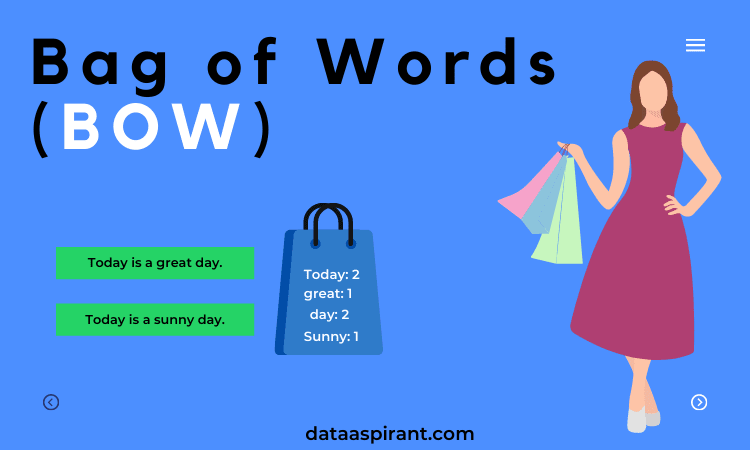

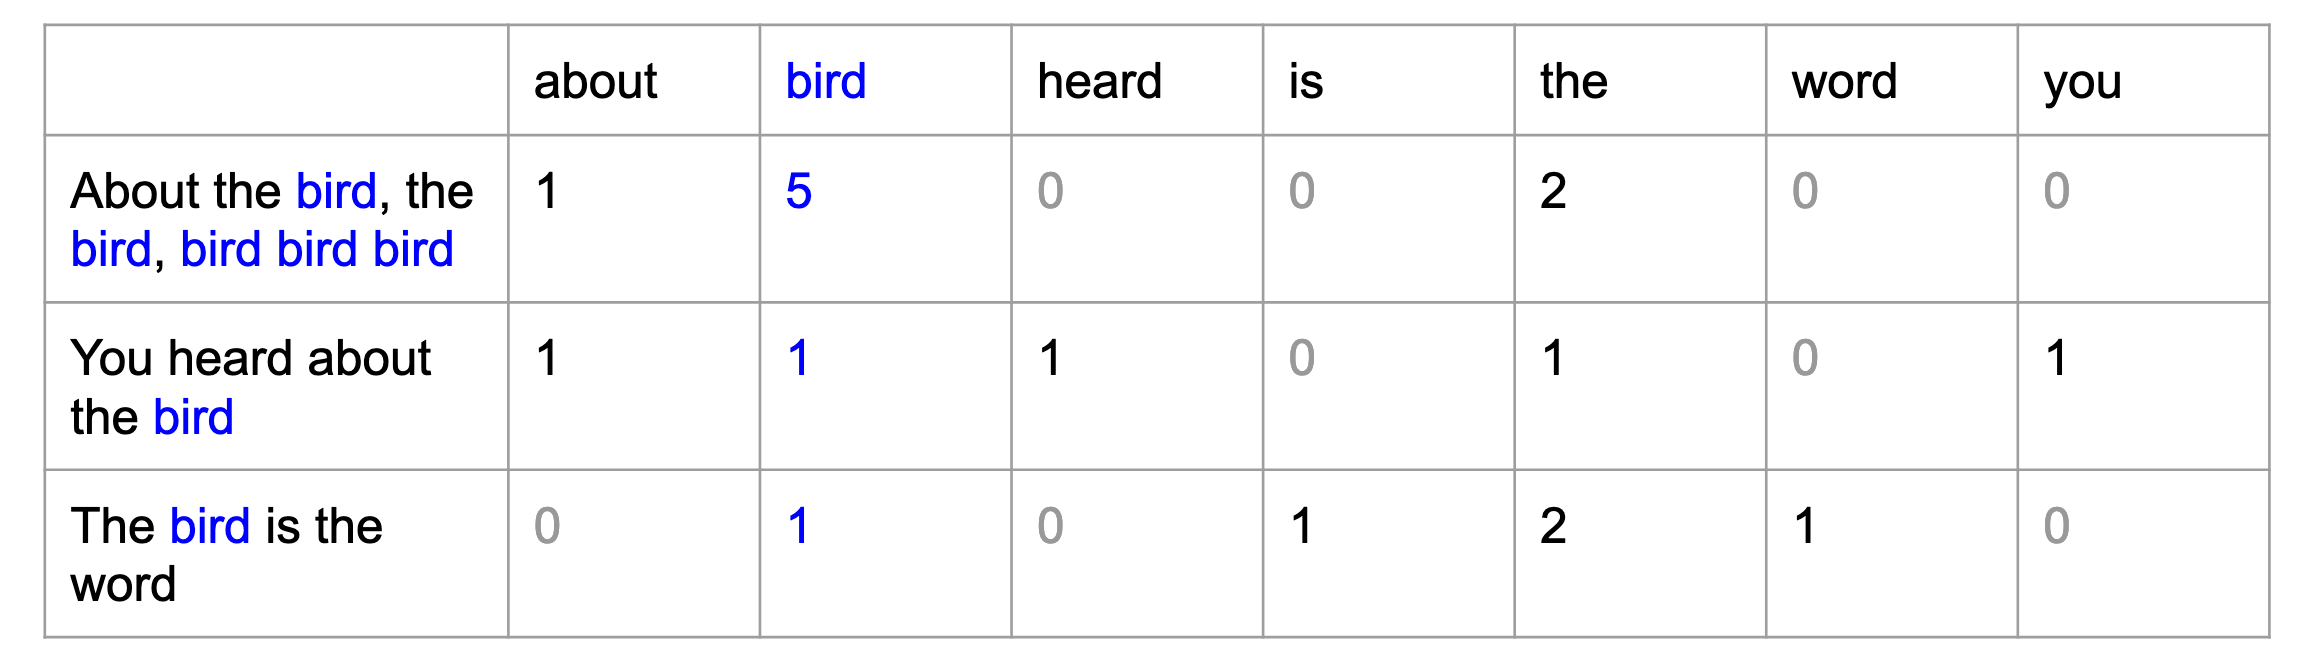

### Code

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # memanggil class untuk method BoW
X = vectorizer.fit_transform(textClean) # mentransform data review ke BoW
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


Pada tahapan deployment
*   Object hasil pemanggilan class CountVectorizer (BoW) ini juga harus disimpan dengan format pickle
*   Fungsinya agar ketika data baru masuk, data tsb juga bisa diekstrak vektornya dengan CountVectorizer
*   **Kenapa tidak bikin baru saja object CountVectorizer di script model.py?**

Di bawah ini opsional. Hanya untuk melihat-lihat hasil ekstraksi fitur.

In [ ]:
vectorizer.get_feature_names_out()

array(['026', '028', '030', ..., 'zucchini', 'zucchinibr', 'îts'],
      dtype=object)

In [ ]:
vectorizer.get_feature_names_out().shape

(6742,)

## TF-IDF

[https://ted-mei.medium.com/demystify-tf-idf](https://ted-mei.medium.com/demystify-tf-idf-in-indexing-and-ranking-5c3ae88c3fa0)

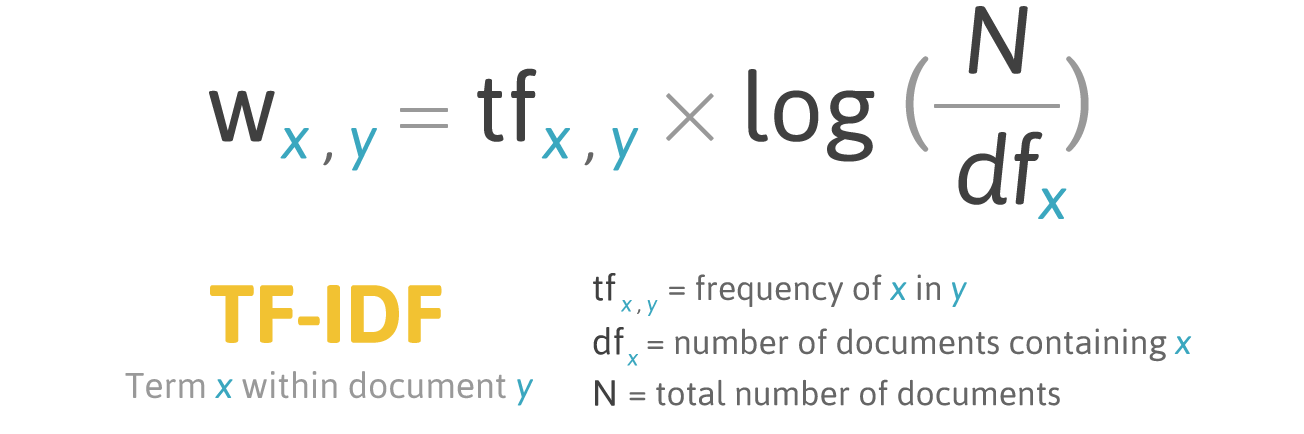

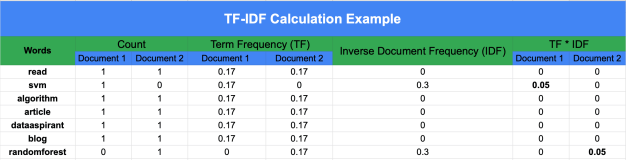

### Code

# Pemodelan Clustering (Next pertemuan)